# Linear Regression Simplified: A Single Neuron Approach

This guide explores the application of a single neuron model to linear regression, using the Real Estate Valuation dataset. The goal is to demonstrate how linear relationships between property features can be modeled to predict real estate values.

## Linear Regression Essentials

### Introduction to Regression

Regression involves predicting continuous values based on input features. Unlike classification that predicts categorical outcomes, regression models output numerical values, making them ideal for predicting things like property prices based on various characteristics.

### Linear Regression Overview
In linear regression, the assumption is that the target values can be approximated by a linear combination of the input features. This method is particularly effective when the relationship between variables exhibits a linear trend, which is often the case in real estate pricing where property features linearly correlate with market values.

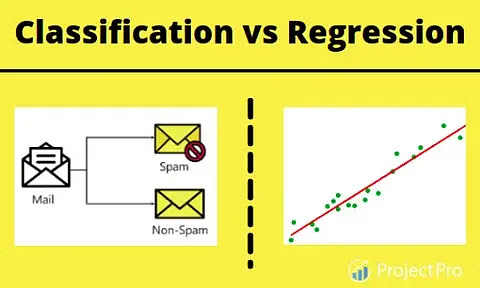

For example, the input features for this model would be 'attributes' of the Mail. 

In Classification, these attributes would analyzed to determine if the mail is Spam or Non-Spam, also known as the output labels.

However, in Regression, these attributes would be analyzed to predict a non-binary quality of the mail, i.e. the date it was delivered. Here, the output label would be the date.

## Single Neuron Model Explained

### Overview of the Model

A single neuron model is a minimalistic neural network that uses a straightforward linear function to map inputs to outputs. This model is pivotal for understanding the fundamentals of neural network operations and serves as a stepping stone to more complex architectures.


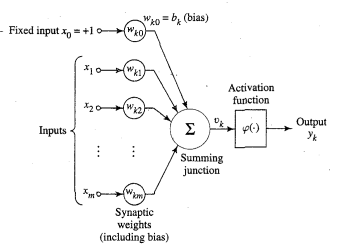

### Importance of the MSE Cost Function
To quantify the accuracy of predictions, the mean squared error (MSE) is employed. It measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. Reducing the MSE is synonymous with improving the accuracy of the model.

### Mean Squared Error (MSE) Cost Function

The Mean Squared Error (MSE) cost function is widely used in regression to measure the average of the squares of the errors or deviations—that is, the difference between the actual values and the predicted values. The MSE formula is given by:

$$
\text{MSE} = \frac{1}{2n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Where:
- n is the number of data points in the dataset.
- $ y_i $ represents the actual value of the i-th data point.
- $ \hat{y}_i $ represents the predicted value for the i-th data point, computed by the regression model.

This function averages the squared differences between the observed actual outcomes and the outcomes predicted by the model. Squaring the differences avoids the problem of canceling out negative differences with positive ones. The aim in regression analysis is to minimize the MSE, which would indicate that the model fits the data well.


## Model Optimization Techniques
### Implementing Gradient Descent
The gradient descent algorithm is crucial for fine-tuning the model's parameters. It iteratively modifies the parameters to lower the MSE, effectively enhancing the model’s prediction capabilities by navigating the path of steepest descent in the error surface.

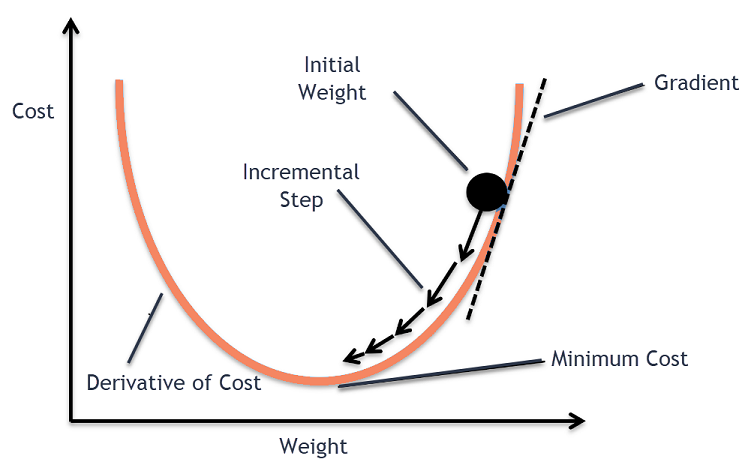

## Mechanics of Derivative Computation
The application of gradient descent necessitates the computation of gradients, specifically the partial derivatives of the MSE with respect to the model parameters. These gradients provide the necessary direction and magnitude for parameter adjustments.

## Gradient Descent Variations

### Batch Gradient Descent
Batch Gradient Descent is an optimization algorithm commonly used in machine learning to minimize the cost function, such as the Mean Squared Error (MSE) in regression models. The algorithm updates the model parameters using the entire dataset at once. The update rule for Batch Gradient Descent is given by:

$$
\theta = \theta - \eta \cdot \nabla_\theta \text{MSE}
$$

Where:
- $ \theta $ represents the parameters of the model (e.g., weights in linear regression).
- $ \eta $ is the learning rate, which controls the step size during the minimization process.
- $ \nabla_\theta \text{MSE} $ denotes the gradient of the MSE cost function with respect to the parameters $ \theta $.

**Steps involved in Batch Gradient Descent:**
1. Calculate the gradient of the cost function for the whole dataset.
2. Update the parameters $ \theta $ by subtracting a fraction (defined by $ \eta $) of the gradient.
3. Repeat the process until the cost function converges to a minimum or a specified number of iterations is reached.

This method ensures that the update in each iteration is performed in the direction that reduces the MSE the most, based on the entire dataset. However, it can be computationally expensive for large datasets because it processes all data points at every single iteration.

### Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) is an optimization algorithm used extensively in machine learning, especially for training large datasets efficiently. Unlike Batch Gradient Descent, which uses the entire dataset to update model parameters, SGD updates the parameters using only one sample (or a small batch) at a time. This makes SGD faster and able to be applied to online learning. The update rule for SGD is given by:

$$
\theta = \theta - \eta \cdot \nabla_\theta J(\theta; x^{(i)}, y^{(i)})
$$

Where:
- $ \theta $ represents the model parameters.
- $ \eta $ is the learning rate.
- $ \nabla_\theta J(\theta; x^{(i)}, y^{(i)}) $ is the gradient of the cost function $ J $ with respect to the parameters $ \theta $, evaluated at a single data point $ (x^{(i)}, y^{(i)}) $.

**Steps involved in Stochastic Gradient Descent:**
1. Randomly shuffle the dataset at the beginning of each epoch.
2. For each sample in the dataset:
   - Compute the gradient of the cost function based on the single sample.
   - Update the parameters $ \theta $ by subtracting the product of the learning rate $ \eta $ and the gradient.
3. Repeat the process for a number of epochs or until the cost function converges to a minimum.

SGD is particularly useful for datasets that are too large to fit into memory or when faster convergence over iterations is required. It often converges much faster than Batch Gradient Descent because of the frequent updates.


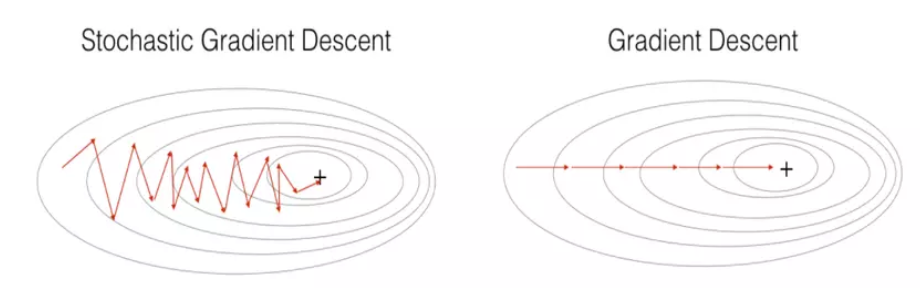

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

sns.set_theme()

## Practical Application
### Building the Single Neuron Class
A SingleNeuron class is designed to encapsulate the model, integrating methods that facilitate training via stochastic gradient descent. This modular approach allows for iterative parameter adjustment based on individual data insights, promoting effective incremental learning.

In [2]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

In [3]:
def linear_activation(z):
    return z


In [13]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 

y = y[:50].values

Here, I retrieve the first 50 instances from the Real Estate Valuation dataset. The y vector, also known as the output vector, represents the house price of unit area.

I need to choose an attribute that is strongly correlated with the output, so I will plot the relationship between an attribute and its corresponding output.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


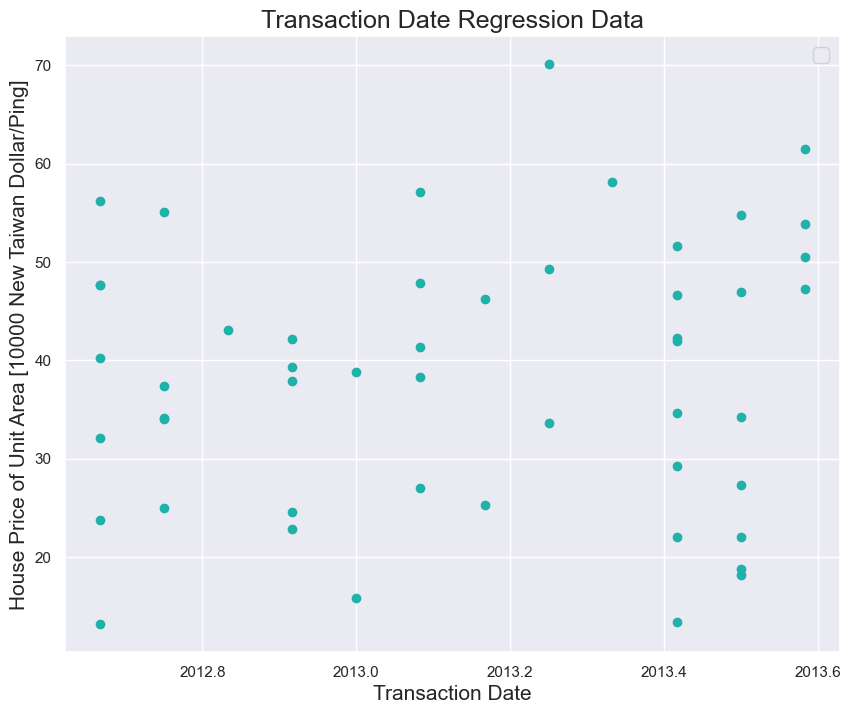

In [15]:
X_1 = X[:50][['X1 transaction date']].values
X_1 = X_1.reshape(-1, 1)


plt.figure(figsize = (10, 8))
plt.scatter(X_1, y, color = "lightseagreen")
plt.xlabel("Transaction Date", fontsize = 15)
plt.ylabel("House Price of Unit Area [10000 New Taiwan Dollar/Ping]", fontsize = 15)
plt.title("Transaction Date Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

Here we can see the attribute 'Transaction Date' does not have a strong linear correlation with the Price, so we need to choose a different covariate.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


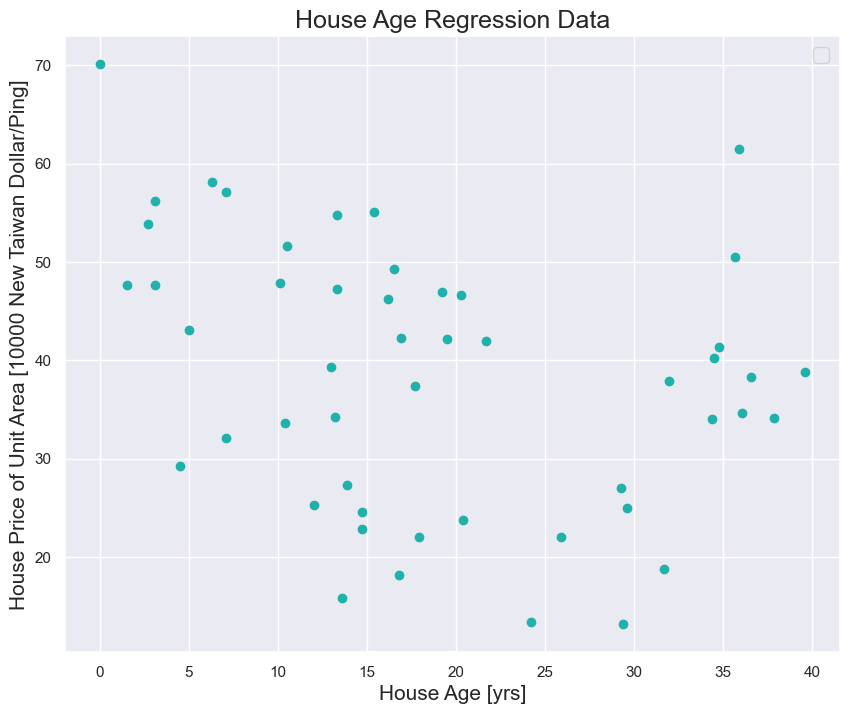

In [16]:
X_2 = X[:50][['X2 house age']].values
X_2 = X_2.reshape(-1, 1)


plt.figure(figsize = (10, 8))
plt.scatter(X_2, y, color = "lightseagreen")
plt.xlabel("House Age [yrs]", fontsize = 15)
plt.ylabel("House Price of Unit Area [10000 New Taiwan Dollar/Ping]", fontsize = 15)
plt.title("House Age Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

This is a little better, but still not a strong enough correlation.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


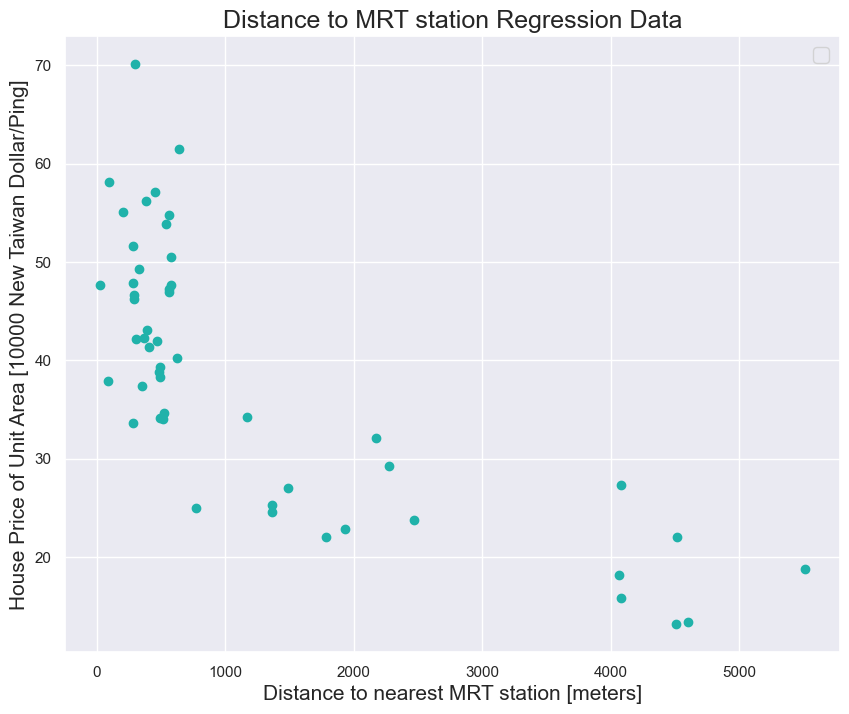

In [17]:
X = X[:50][['X3 distance to the nearest MRT station']].values
X = X.reshape(-1, 1)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen")
plt.xlabel("Distance to nearest MRT station [meters]", fontsize = 15)
plt.ylabel("House Price of Unit Area [10000 New Taiwan Dollar/Ping]", fontsize = 15)
plt.title("Distance to MRT station Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

Finally! The attribute 'Distance to nearest MRT station' shows a great linear relationship with the Price. We can move on to making our model.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Since our data varies in size, it can mess up our model. Therefore we need to scale it.

/var/folders/f1/tx7ncsx927300wccrq8xd2680000gn/T/ipykernel_96677/2096239459.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w_[-1] -= alpha*error
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


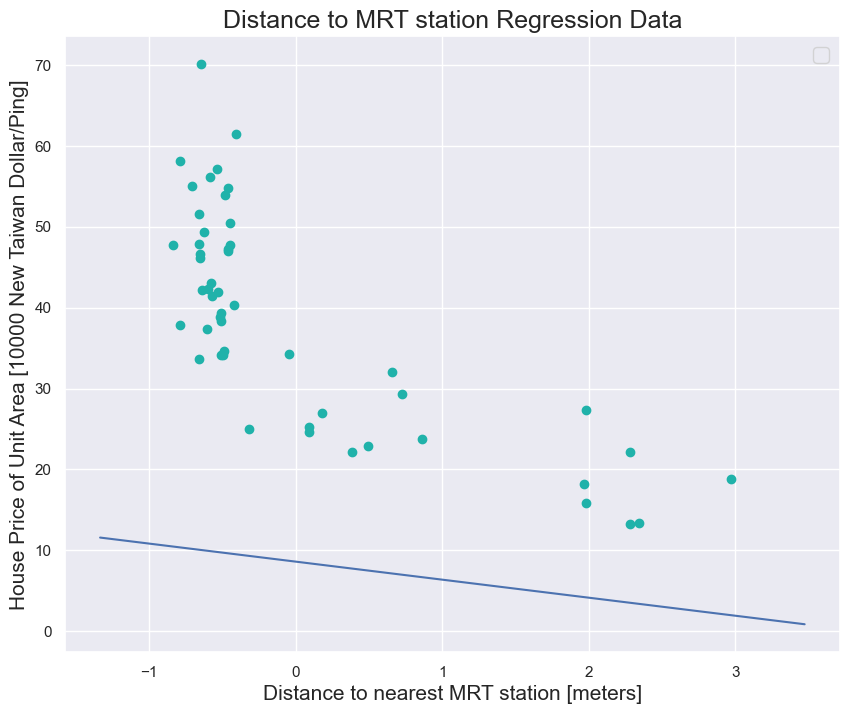

In [19]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.001, epochs = 5) 

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Distance to nearest MRT station [meters]", fontsize = 15)
plt.ylabel("House Price of Unit Area [10000 New Taiwan Dollar/Ping]", fontsize = 15)
plt.title("Distance to MRT station Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

After training our model for 5 epochs, we can see that it has not learned enough. Let's see the change in error with each epoch.

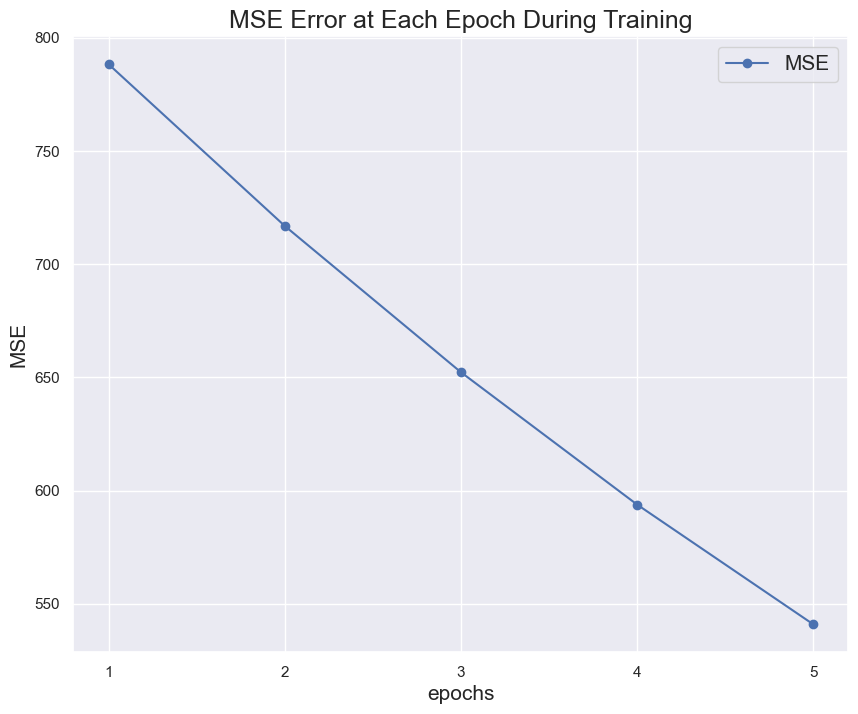

In [9]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

This is great news. Our model is learning, it just needs more iterations. Lets change it to 50 epochs and see what happens.

/var/folders/f1/tx7ncsx927300wccrq8xd2680000gn/T/ipykernel_96677/2096239459.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w_[-1] -= alpha*error
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


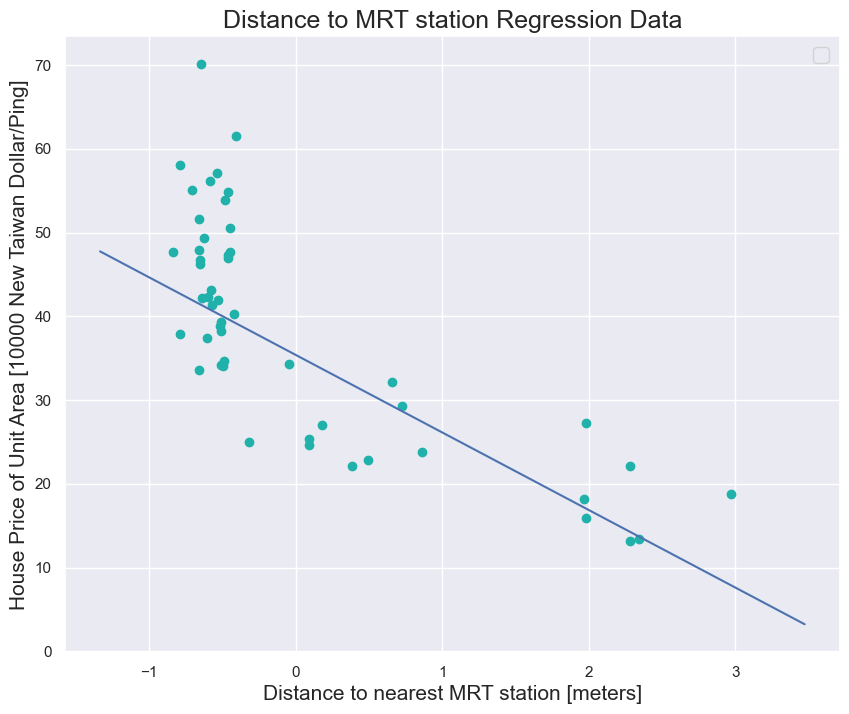

In [20]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.001, epochs = 50) 

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Distance to nearest MRT station [meters]", fontsize = 15)
plt.ylabel("House Price of Unit Area [10000 New Taiwan Dollar/Ping]", fontsize = 15)
plt.title("Distance to MRT station Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

Here, we can see our linear model looks extremely accurate. Let's evaluate the MSE.

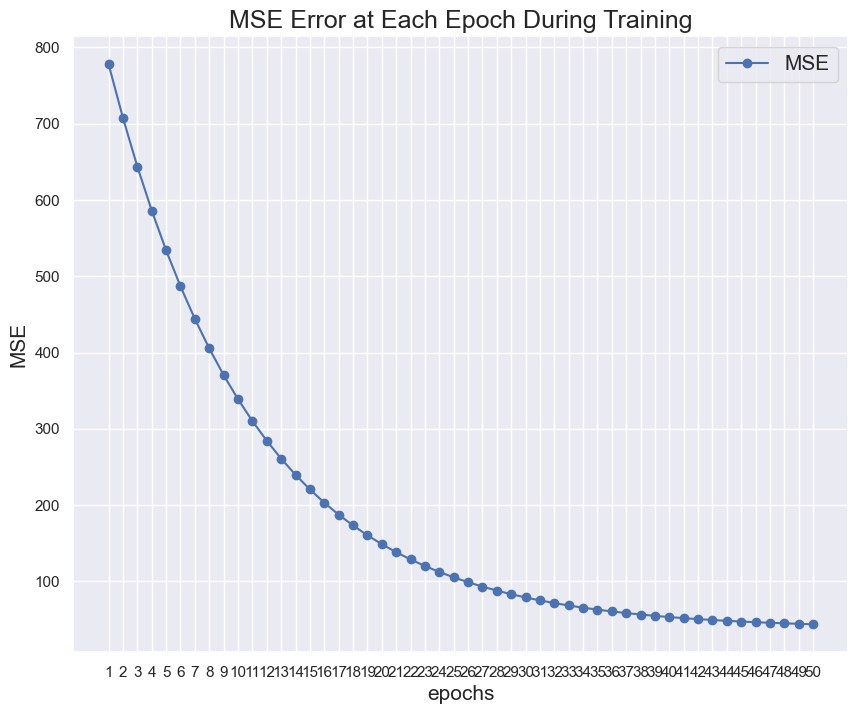

In [11]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

We can see our MSE is starting to stabilize, with a great learning curve. Let's train this model one more time at 100 iterations.

/var/folders/f1/tx7ncsx927300wccrq8xd2680000gn/T/ipykernel_96677/2096239459.py:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w_[-1] -= alpha*error
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


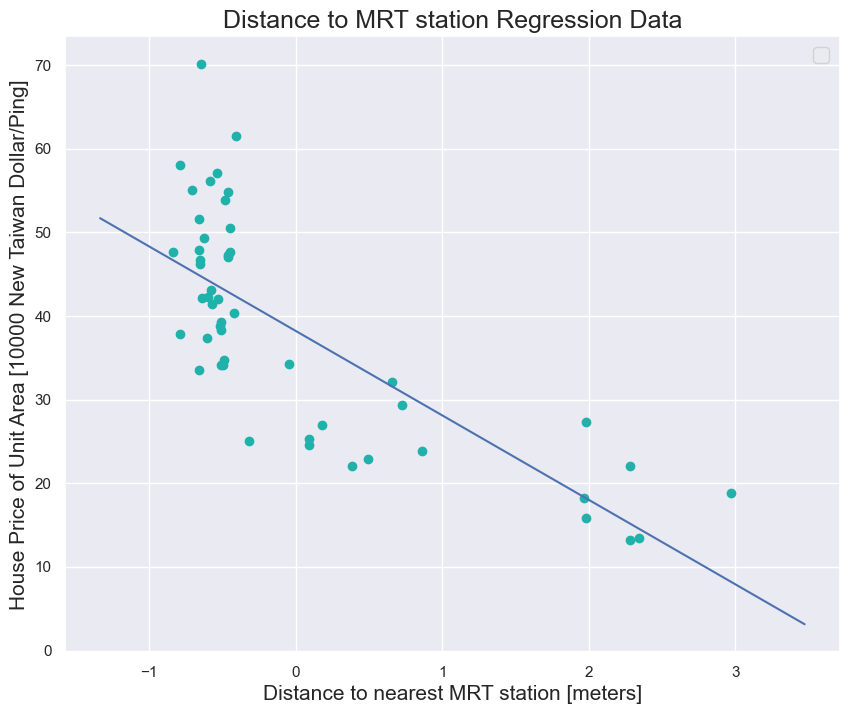

In [21]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.001, epochs = 100) 

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Distance to nearest MRT station [meters]", fontsize = 15)
plt.ylabel("House Price of Unit Area [10000 New Taiwan Dollar/Ping]", fontsize = 15)
plt.title("Distance to MRT station Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

There doesn't seem to be much change in the linear model, let's evaluate the MSE to see if it's any lower.

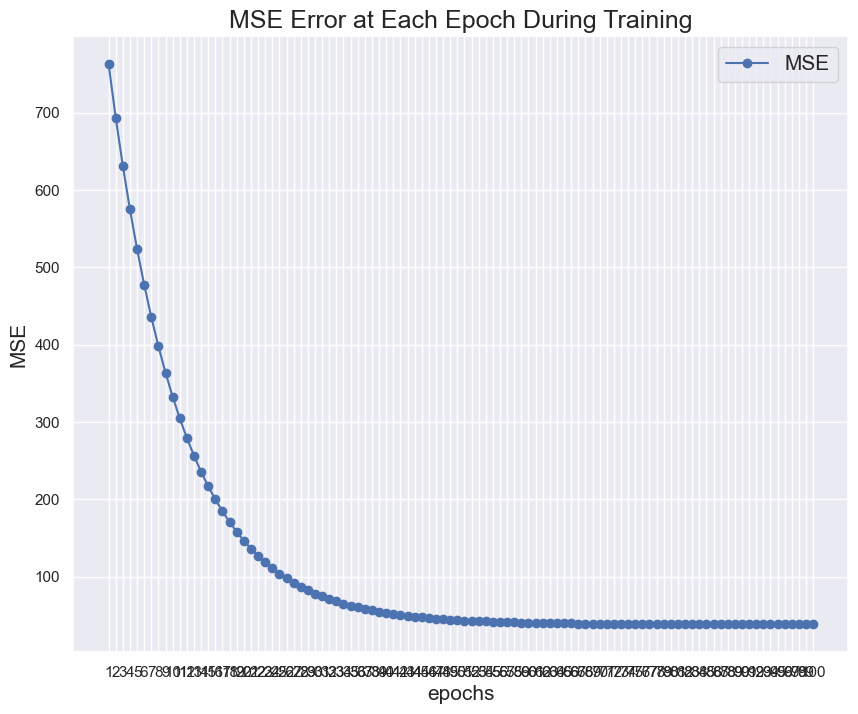

In [22]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

It looks like our MSE has officially stabilized, and this is as accurate as our model will get! Let's move onto the next type of ML.